In [84]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pydataset import data
import acquire
import prepare
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

- ### Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [85]:
df= pd.read_csv('titanic_df.csv')
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [86]:
df = prepare.prep_titanic(df)
df

,Unnamed: 0,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,0,3,male,1,0,7.2500,Southampton,0,0,1,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,1,0
3,3,1,1,female,1,0,53.1000,Southampton,0,0,1,0
4,4,0,3,male,0,0,8.0500,Southampton,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1,0,1,1
887,887,1,1,female,0,0,30.0000,Southampton,1,0,1,0
888,888,0,3,female,1,2,23.4500,Southampton,0,0,1,0
889,889,1,1,male,0,0,30.0000,Cherbourg,1,0,0,1


In [87]:
df = df.drop(columns= ['Unnamed: 0', 'sex', 'embark_town'])
df

,survived,pclass,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,3,1,0,7.2500,0,0,1,1
1,1,1,1,0,71.2833,0,0,0,0
2,1,3,0,0,7.9250,1,0,1,0
3,1,1,1,0,53.1000,0,0,1,0
4,0,3,0,0,8.0500,1,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1,0,1,1
887,1,1,0,0,30.0000,1,0,1,0
888,0,3,1,2,23.4500,0,0,1,0
889,1,1,0,0,30.0000,1,0,0,1


In [88]:
# write a function to compute the baseline for a classification model

def get_baseline(y_train):
    #  establish the value we will predict for all observations
    baseline_prediction = y_train.mode()

    # create a series of predictions with that value, 
    # the same length as our training set
    y_train_pred = pd.Series([0]*len(y_train))

    # compute accuracy of baseline
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn)/(tn+fp+fn+tp)
    return accuracy

In [110]:
get_baseline(y_train)

0.6177062374245473

- ### Evaluate your results using the model score, confusion matrix, and classification report.

In [111]:
# model score

accuracy_train = knn.score(X_train, y_train)
accuracy_train

0.7907444668008048

In [112]:
# confusion matrix

cm = confusion_matrix(y_train, y_train_pred)
pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
             columns=['Pred 0', 'Pred 1'])

,Pred 0,Pred 1
Actual 0,268,39
Actual 1,65,125


In [113]:
# classification report

pd.DataFrame(classification_report(y_train, 
                                   y_train_pred, 
                                   output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.804805,0.762195,0.790744,0.783500,0.788515
recall,0.872964,0.657895,0.790744,0.765429,0.790744
f1-score,0.837500,0.706215,0.790744,0.771857,0.787310
support,307.000000,190.000000,0.790744,497.000000,497.000000


- ### Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [114]:
def print_cm_metrics(cm):
    # extract tp, tn, fp, fn from the confusion matrix to use in calculations
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn)/(tn + fp + fn + tp)
    print(f"Accuracy: {accuracy}")

    true_positive_rate = tp/(tp + fn)
    print(f"True Positive Rate: {true_positive_rate}")

    false_positive_rate = fp/(fp + tn)
    print(f"False Positive Rate: {false_positive_rate}")

    true_negative_rate = tn/(tn + fp)
    print(f"True Negative Rate: {true_negative_rate}")

    false_negative_rate = fn/(fn + tp)
    print(f"False Negative Rate: {false_negative_rate}")

    precision = tp/(tp + fp)
    print(f"Precision: {precision}")

    recall = tp/(tp + fn)
    print(f"Recall: {recall}")

    f1_score = 2*(precision*recall)/(precision+recall)
    print(f"F1 Score: {f1_score}")

    support_pos = tp + fn
    print(f"Support (0): {support_pos}")

    support_neg = fp + tn
    print(f"Support (1): {support_neg}")
    
print_cm_metrics(cm)

Accuracy: 0.7907444668008048
True Positive Rate: 0.6578947368421053
False Positive Rate: 0.1270358306188925
True Negative Rate: 0.8729641693811075
False Negative Rate: 0.34210526315789475
Precision: 0.7621951219512195
Recall: 0.6578947368421053
F1 Score: 0.7062146892655367
Support (0): 190
Support (1): 307


- ### Run through steps 1-3 setting k to 10

In [115]:
def knn_fit_predict(k, X_train, y_train, X_validate):
    # create the object
    knn = KNeighborsClassifier(n_neighbors=k)

    # create the model
    knn.fit(X_train, y_train)

    # run the model
    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)
    
    return knn, y_train_pred, y_val_pred

def evaluate_clf(model, X, y, y_pred):
    # model score
    accuracy = model.score(X, y)
    print(f'Accuracy: {accuracy}')

    # confusion matrix
    cm = confusion_matrix(y, y_pred)
    print('Confusion Matrix')
    print(pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
                       columns=['Pred 0', 'Pred 1']))

    # classification report
    print('Classification Report')
    print(pd.DataFrame(classification_report(y, y_pred,
                                             output_dict=True)))
    # confusion matrix metrics
    print_cm_metrics(cm)
    
    return accuracy

In [116]:
k = 10
print(f'KNN where K = {k}' )

knn, y_train_pred, y_val_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_val)

KNN where K = 10


In [117]:
y_train_pred, y_val_pred

(array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 

In [118]:
print('Train Evaluation\n')
train_accuracy = evaluate_clf(knn, X_train, y_train, y_train_pred)
print('\nValidate Evaluation\n')
val_accuracy = evaluate_clf(knn, X_val, 
                                 y_val, y_val_pred)

Train Evaluation

Accuracy: 0.7907444668008048
Confusion Matrix
          Pred 0  Pred 1
Actual 0     268      39
Actual 1      65     125
Classification Report
                    0           1  accuracy   macro avg  weighted avg
precision    0.804805    0.762195  0.790744    0.783500      0.788515
recall       0.872964    0.657895  0.790744    0.765429      0.790744
f1-score     0.837500    0.706215  0.790744    0.771857      0.787310
support    307.000000  190.000000  0.790744  497.000000    497.000000
Accuracy: 0.7907444668008048
True Positive Rate: 0.6578947368421053
False Positive Rate: 0.1270358306188925
True Negative Rate: 0.8729641693811075
False Negative Rate: 0.34210526315789475
Precision: 0.7621951219512195
Recall: 0.6578947368421053
F1 Score: 0.7062146892655367
Support (0): 190
Support (1): 307

Validate Evaluation

Accuracy: 0.6728971962616822
Confusion Matrix
          Pred 0  Pred 1
Actual 0      97      35
Actual 1      35      47
Classification Report
                

- ### Run through steps 1-3 setting k to 20

In [119]:
k = 20
print(f'KNN where K = {k}' )

knn, y_train_pred, y_val_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_val)

print('Train Evaluation\n')
train_accuracy = evaluate_clf(knn, X_train, y_train, y_train_pred)
print('\nValidate Evaluation\n')
val_accuracy = evaluate_clf(knn, X_val, 
                                 y_val, y_val_pred)


KNN where K = 20
Train Evaluation

Accuracy: 0.7585513078470825
Confusion Matrix
          Pred 0  Pred 1
Actual 0     261      46
Actual 1      74     116
Classification Report
                    0           1  accuracy   macro avg  weighted avg
precision    0.779104    0.716049  0.758551    0.747577      0.754999
recall       0.850163    0.610526  0.758551    0.730345      0.758551
f1-score     0.813084    0.659091  0.758551    0.736088      0.754213
support    307.000000  190.000000  0.758551  497.000000    497.000000
Accuracy: 0.7585513078470825
True Positive Rate: 0.6105263157894737
False Positive Rate: 0.1498371335504886
True Negative Rate: 0.8501628664495114
False Negative Rate: 0.3894736842105263
Precision: 0.7160493827160493
Recall: 0.6105263157894737
F1 Score: 0.6590909090909091
Support (0): 190
Support (1): 307

Validate Evaluation

Accuracy: 0.6822429906542056
Confusion Matrix
          Pred 0  Pred 1
Actual 0     101      31
Actual 1      37      45
Classification Report


- ### What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [120]:
metrics = []

for k in range(1,20):
    knn, y_train_pred, y_val_pred = knn_fit_predict(k, X_train, 
                                                    y_train, 
                                                    X_val)
    train_acc = knn.score(X_train, y_train)
    val_acc = knn.score(X_val, y_val)
    
    output = {
            "k": k,
            "train_accuracy": train_acc,
            "validate_accuracy": val_acc
    }

    metrics.append(output)

In [121]:
eval_df = pd.DataFrame(metrics)
# add a difference column of diff between train and validate
eval_df['difference'] = eval_df['train_accuracy'] - eval_df['validate_accuracy']

eval_df

,k,train_accuracy,validate_accuracy,difference
0,1,0.927565,0.682243,0.245322
1,2,0.863179,0.700935,0.162244
2,3,0.865191,0.668224,0.196967
3,4,0.832998,0.710280,0.122718
4,5,0.822938,0.677570,0.145368
5,6,0.814889,0.696262,0.118628
6,7,0.824950,0.686916,0.138034
7,8,0.808853,0.677570,0.131283
8,9,0.810865,0.677570,0.133295
9,10,0.790744,0.672897,0.117847


- ### Which model performs best on our out-of-sample data from validate?

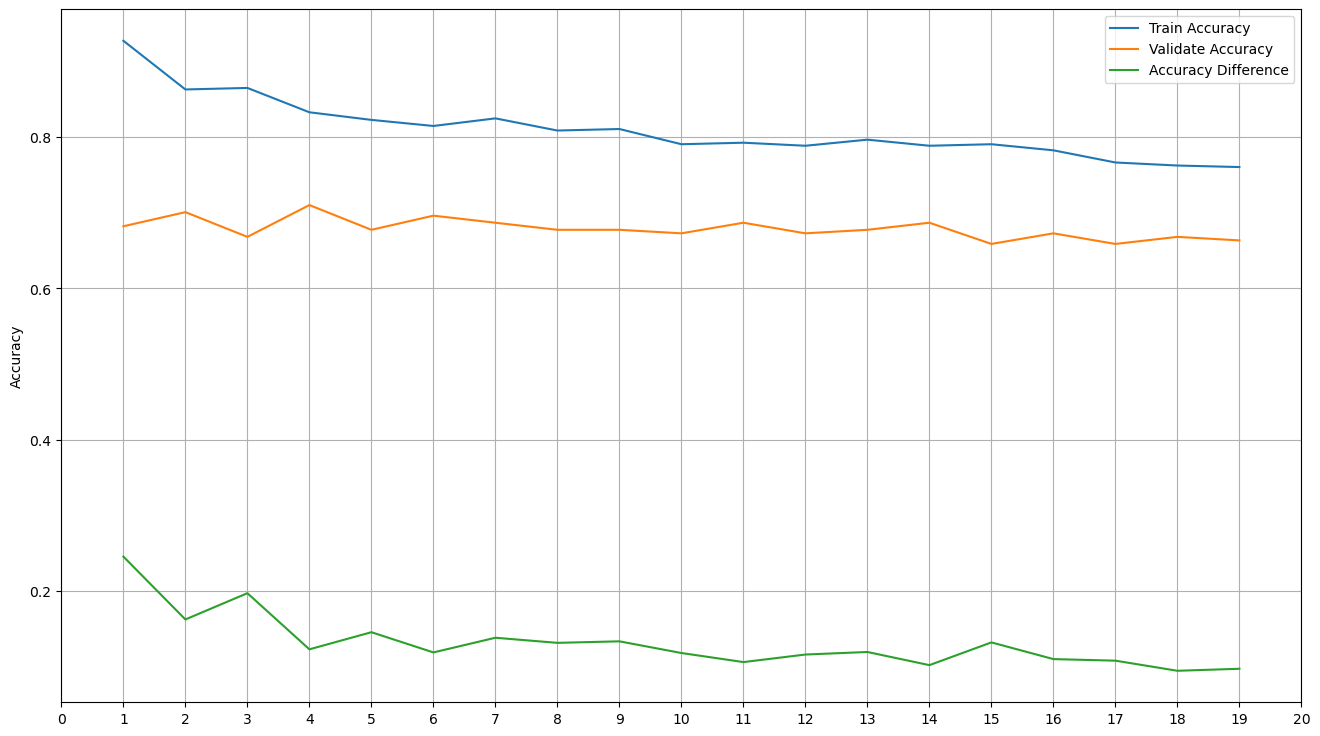

In [122]:
# plot the data
plt.figure(figsize=(16,9))

# plot train accuracy against k
plt.plot(eval_df.k, eval_df.train_accuracy, label='Train Accuracy')

# plot validate accuracy against k
plt.plot(eval_df.k, eval_df.validate_accuracy, label='Validate Accuracy')

# plot the difference against k
plt.plot(eval_df.k, eval_df.difference, label='Accuracy Difference')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(np.arange(0,21,1))
plt.grid()
plt.show()

In [123]:
k = 15
print(f'KNN where K = {k}' )

knn, y_train_pred, y_validate_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_val)

print('Train Evaluation\n')
train_accuracy = evaluate_clf(knn, X_train, y_train, y_train_pred)

print('\nValidate Evaluation\n')
validate_accuracy = evaluate_clf(knn, X_val, 
                                 y_val, y_validate_pred)

KNN where K = 15
Train Evaluation

Accuracy: 0.7907444668008048
Confusion Matrix
          Pred 0  Pred 1
Actual 0     257      50
Actual 1      54     136
Classification Report
                    0           1  accuracy   macro avg  weighted avg
precision    0.826367    0.731183  0.790744    0.778775      0.789978
recall       0.837134    0.715789  0.790744    0.776462      0.790744
f1-score     0.831715    0.723404  0.790744    0.777560      0.790309
support    307.000000  190.000000  0.790744  497.000000    497.000000
Accuracy: 0.7907444668008048
True Positive Rate: 0.7157894736842105
False Positive Rate: 0.16286644951140064
True Negative Rate: 0.8371335504885994
False Negative Rate: 0.28421052631578947
Precision: 0.7311827956989247
Recall: 0.7157894736842105
F1 Score: 0.7234042553191489
Support (0): 190
Support (1): 307

Validate Evaluation

Accuracy: 0.6588785046728972
Confusion Matrix
          Pred 0  Pred 1
Actual 0      90      42
Actual 1      31      51
Classification Repor